In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import  dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

In [18]:
def plot_dendrogram(model, **kwrangs):
  #Linkage Metrics ---> dendrogram
  #Count of sample under each node
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i,merge in enumerate(model.children_):
      current_count = 0
      for child_index in merge:
        if child_index < n_samples:
          current_count += 1 # Leaf Node
        else:
          current_count += counts[child_index-n_samples]
      counts[i] = current_count

  linkage_metrics = np.column_stack(
      [model.children_, model.distances_, counts]
  ).astype(float)

  dendrogram(linkage_metrics, **kwrangs)          

In [19]:
dataset = load_iris()

In [20]:
X  = dataset.data

In [21]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [23]:
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

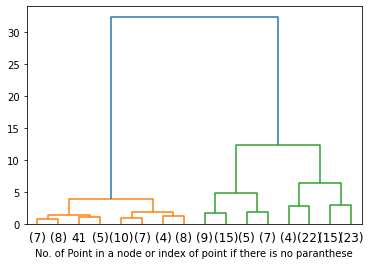

In [25]:
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("No. of Point in a node or index of point if there is no paranthese")
plt.show()

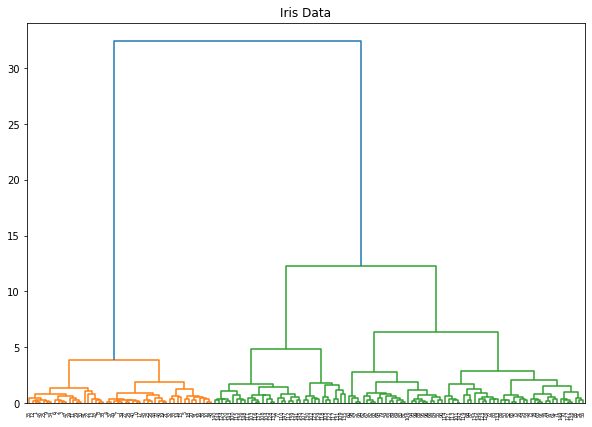

In [29]:
# Another Way To Used Linkage Metrics
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title("Iris Data")
dend = dendrogram(linkage(X,method="ward"))

In [30]:
y_pred = model.fit_predict(X)

In [31]:
X[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

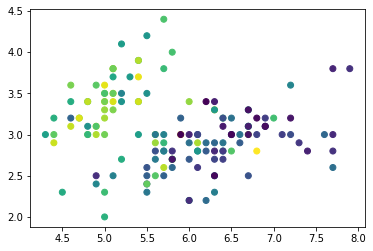

In [32]:
plt.scatter(X[:,0],X[:,1],c=y_pred)

In [34]:
model2 = AgglomerativeClustering(n_clusters=2)

In [35]:
model2.fit(X)

AgglomerativeClustering()

In [36]:
y_pred2 = model2.fit_predict(X)

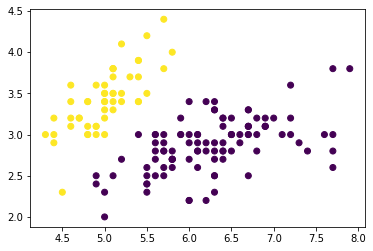

In [37]:
plt.scatter(X[:,0],X[:,1],c=y_pred2)